 # Predicting Brain Strokes

In [1]:
import sqlalchemy
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# Database Setup
engine = create_engine("sqlite:///../resources/stroke_data.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

#test view all classes found by automap
Base.classes.keys()

conn = engine.connect()

#populate obesity table
stroke_df = pd.read_sql("SELECT * FROM stroke_data", conn)

stroke_df.head()

,?,age,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,1.040584334185826,2.723410903530197,1.193238162209789,0,1,0,1,0,0,0,1,0,1,0,0,1
1,1,1.614270327485722,-0.0005227665986433442,0.5893896105370293,0,1,0,1,0,0,1,0,0,0,1,0,1
2,2,0.24624988192443203,1.4485291841720218,0.8692218661902591,0,1,0,1,0,0,0,1,0,0,0,1,1
3,3,1.5701406356934222,1.5126504540805694,-0.6624915331747888,0,1,0,0,1,0,1,0,0,0,1,0,1
4,4,1.6584000192780215,1.7808947977464298,0.07390913959686891,0,1,0,1,0,0,0,1,0,1,0,0,1


In [2]:
#Define features and target
y = stroke_df["stroke"]
X = stroke_df.drop(columns="stroke")

In [3]:
#Split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(3735, 16)

In [4]:
#Logistic Regression 
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [5]:
#Train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [6]:
#First score using test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9619812583668005
Testing Data Score: 0.9558587479935795


In [28]:
#Make predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results

# Define the file path for the CSV file
csv_file_path = "prediction_results.csv"

# Export the DataFrame to a CSV file
results.to_csv(csv_file_path, index=False)


In [8]:
# Calculate the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9558587479935795

In [22]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, predictions)

# Extracting values from the confusion matrix
true_negatives = confusion[0, 0]
false_positives = confusion[0, 1]
false_negatives = confusion[1, 0]
true_positives = confusion[1, 1]

print("Confusion Matrix:")
print(confusion)
print("\nTrue Negatives:", true_negatives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)
print("True Positives:", true_positives)

Confusion Matrix:
[[1179    5]
 [  50   12]]

True Negatives: 1179
False Positives: 5
False Negatives: 50
True Positives: 12


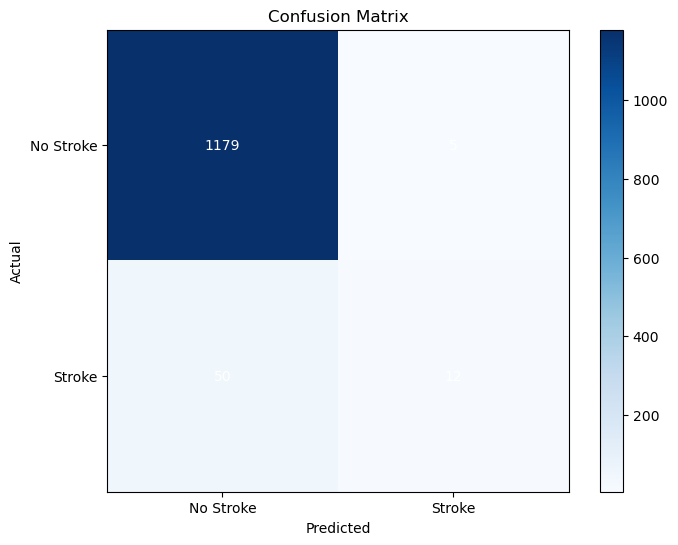

In [21]:
#Make predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Confusion Matrix
confusion = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["No Stroke", "Stroke"])
plt.yticks([0, 1], ["No Stroke", "Stroke"])
plt.colorbar()

# Adding annotations to the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [20]:
# Classification Report
class_report = classification_report(y_test, predictions, target_names=["No Stroke", "Stroke"])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98      1184
      Stroke       0.71      0.19      0.30        62

    accuracy                           0.96      1246
   macro avg       0.83      0.59      0.64      1246
weighted avg       0.95      0.96      0.94      1246



In [16]:
# Getting the coefficients from the trained model
feature_names = X.columns
coefficients = classifier.coef_[0]

# Printing feature names and their corresponding coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")

Feature: ?, Coefficient: -0.0011
Feature: age, Coefficient: 1.5894
Feature: avg_glucose_level, Coefficient: 0.2049
Feature: bmi, Coefficient: -0.0000
Feature: ever_married_No, Coefficient: -0.3448
Feature: ever_married_Yes, Coefficient: -0.5019
Feature: work_type_Govt_job, Coefficient: -0.3228
Feature: work_type_Private, Coefficient: -0.0347
Feature: work_type_Self-employed, Coefficient: -0.3441
Feature: work_type_children, Coefficient: -0.1450
Feature: Residence_type_Rural, Coefficient: -0.4979
Feature: Residence_type_Urban, Coefficient: -0.3488
Feature: smoking_status_Unknown, Coefficient: -0.0752
Feature: smoking_status_formerly smoked, Coefficient: -0.1836
Feature: smoking_status_never smoked, Coefficient: -0.4698
Feature: smoking_status_smokes, Coefficient: -0.1181


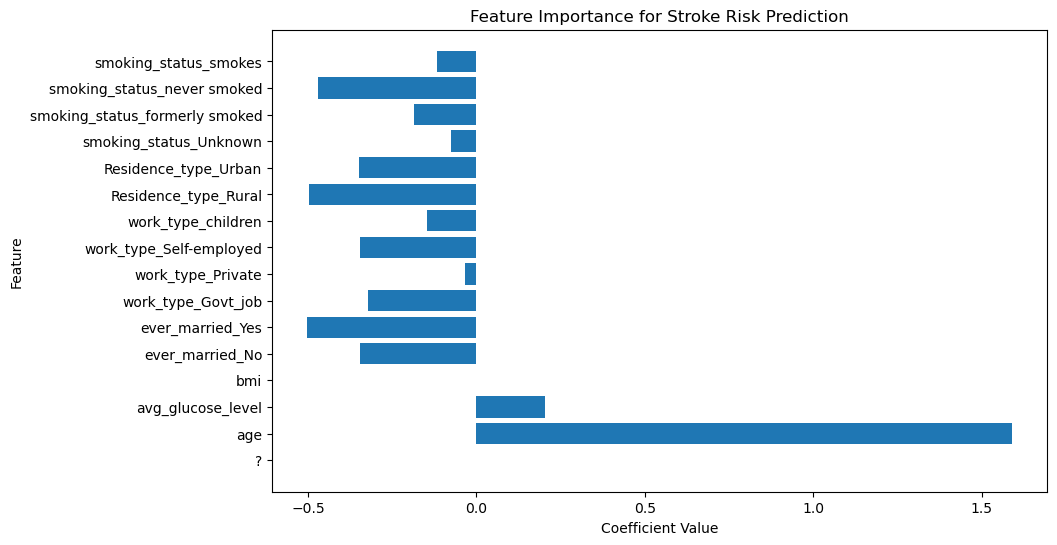

In [17]:
# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Stroke Risk Prediction')
plt.show()